 **MÓDULO 12 - AULA 5**
# Analytics 2: Elementos Visuais - Gráficos Interativos


Para essa aula plotaremos alguns gráficos utilizando uma biblioteca que permite a criação de gráficos interativos.
Essa biblioteca é a ploty.express

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [10]:
# Vamos usar o mesmo dataframe da última aula
idades = np.random.randint(20, 60, 20)
salarios = idades * np.random.randint(80, 120, 20)
pontuacoes = salarios * np.random.uniform(0.5, 1.5, 20)
profissoes = ['Engenheiro', 'Professor', 'Médico', 'Advogado', 'Designer',
              'Analista', 'Gerente', 'Programador']
estado_civil = ['Casado','Solteiro']   #Adicionamos a informação de estado civil


novo_data = {
    'Idade': idades,
    'Salário': salarios,
    'Pontuação': pontuacoes.round(2)
}
df = pd.DataFrame(novo_data)
df['Profissão'] = np.random.choice(profissoes, size=len(df))
df['estado_civil'] = np.random.choice(estado_civil, size=len(df))
df.head(10)

,Idade,Salário,Pontuação,Profissão,estado_civil
0,43,4085,5618.54,Programador,Casado
1,30,2790,2681.56,Engenheiro,Casado
2,22,2442,3435.15,Programador,Solteiro
3,54,4698,5758.54,Programador,Casado
4,59,5428,4121.85,Analista,Casado
5,40,4080,2254.71,Analista,Casado
6,21,1743,1570.00,Analista,Solteiro
7,32,3392,3756.91,Analista,Solteiro
8,23,2691,2014.19,Advogado,Casado
9,43,4515,4487.41,Engenheiro,Casado


Começamos plotando um gráfico de barras horizontais com a média dos salários por profissão:

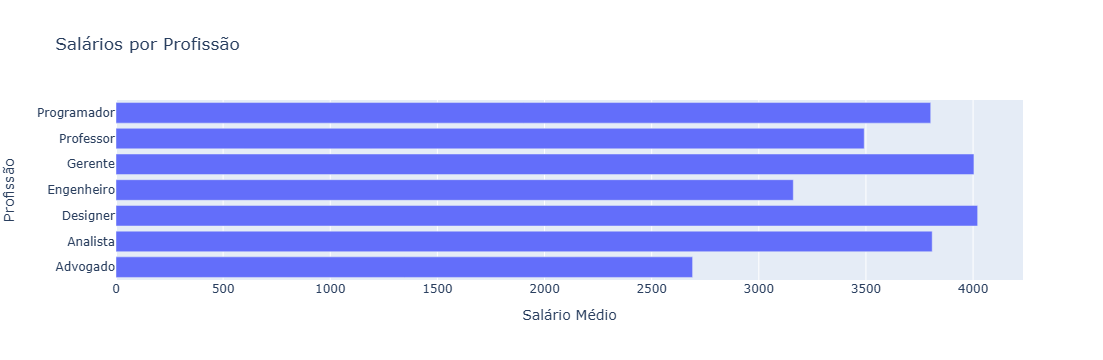

In [11]:
# Agrupando os dados do DataFrame por profissão e calculando a média do salário para cada profissão
salario_por_profissao = df.groupby('Profissão')['Salário'].mean().reset_index()

# Criando o gráfico de barras horizontais, muito semelhante a biblioteca matplot
fig = px.bar(salario_por_profissao, x='Salário', y='Profissão', orientation='h',
             title='Salários por Profissão',
             labels={'Salário': 'Salário Médio', 'Profissão': 'Profissão'})

# Exibindo o gráfico
fig.show()

Para termos a opção de mudar a cor e tamanho:

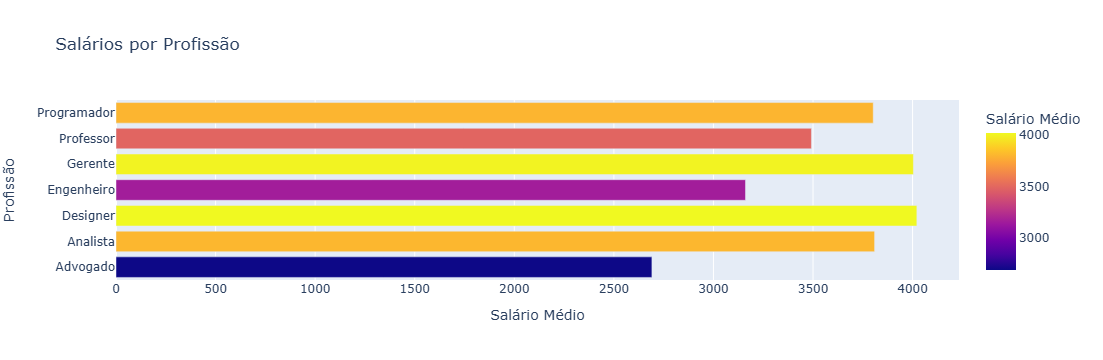

In [12]:

salario_por_profissao = df.groupby('Profissão')['Salário'].mean().reset_index()

fig = px.bar(salario_por_profissao, x='Salário', y='Profissão', orientation='h',
             title='Salários por Profissão',
             labels={'Salário': 'Salário Médio', 'Profissão': 'Profissão'},
             color='Salário',  # Especificando a cor baseada nos valores de salário
             width=800)        # Definindo a largura do gráfico em pixels

fig.show()

Outro visual muito bacana e interativo que essa biblioteca nos permite é o de gráficos de mapa de árvore, não vimos ele nos principais gráficos pois é pouco utilizado, mas nessa biblioteca ele é um dos gráficos com melhor interação:

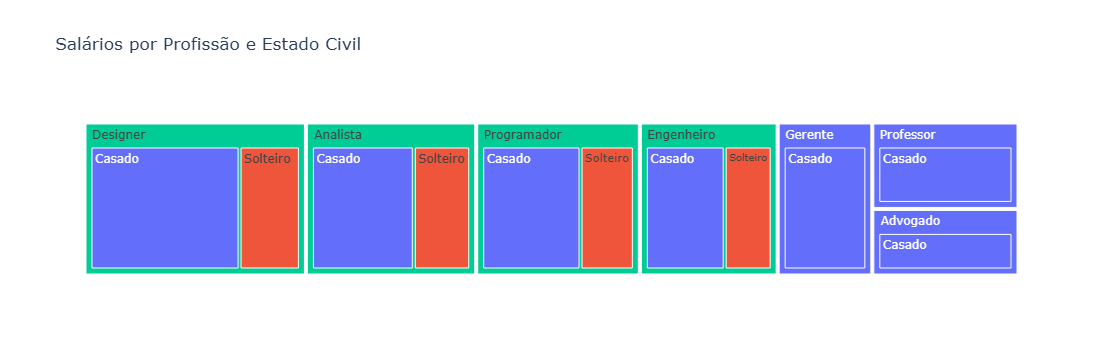

In [14]:
# Aqui agrupamos os dados do DataFrame por profissão e estado civil, e calculando a média do salário para cada profissão e estado civil
salario_por_profissao_estado_civil = df.groupby(['Profissão', 'estado_civil'])['Salário'].mean().reset_index()

# Criando o gráfico de treemap com os salários por profissão, usando as cores para representar o estado civil
fig = px.treemap(salario_por_profissao_estado_civil,
                 path=['Profissão', 'estado_civil'],
                 values='Salário',
                 title='Salários por Profissão e Estado Civil',
                 color='estado_civil')
# Exibindo o gráfico
fig.show()

Agora vamos plotar um boxplot de idade:


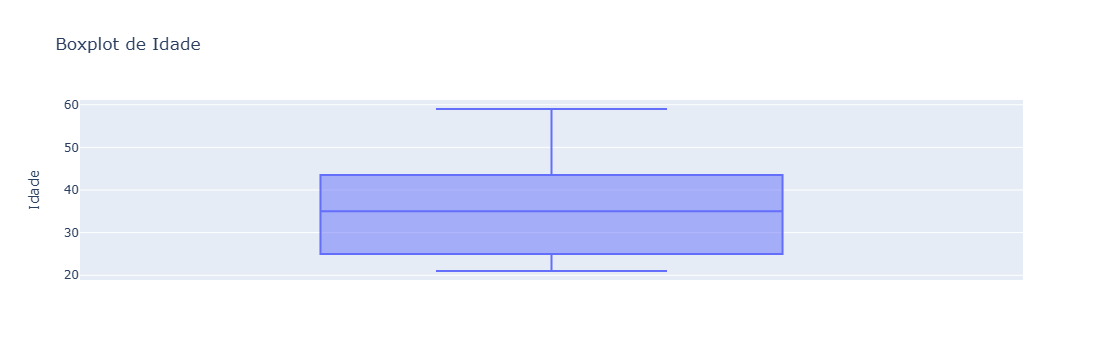

In [15]:
# Criando o boxplot de idade
fig = px.box(df, y='Idade', title='Boxplot de Idade')

# Exibindo o gráfico
fig.show()

Notem que pelos visuais já virem bem completos de informação o código é muito mais simples de ser escrito. Essa biblioteca nos permite gráficos interativos com uma facilidade imensa de programação.

Para estudarem mais essa biblioteca e aprender mais sobre suas funcionalidades segue o link de documentação dela:
https://plotly.com/python/plotly-express/